In [18]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Loading the data
data = pd.read_csv(r'C:\Users\White\Downloads\archive (8)\ecommerce_product_dataset.csv')

In [20]:
print(data.head())

   ProductID ProductName     Category   Price  Rating  NumReviews  \
0          1  Headphones  Electronics  400.31     1.7        3772   
1          2  Headphones  Electronics  235.03     2.3        2919   
2          3  Smartwatch  Electronics  417.90     1.8        1184   
3          4  Smartphone  Electronics  152.70     3.4        2047   
4          5      Laptop  Electronics  394.74     1.8        1267   

   StockQuantity  Discount  Sales   DateAdded  
0             20      0.08    466  2023-11-08  
1            663      0.33   1332  2023-09-26  
2            459      0.31    252  2023-10-18  
3            475      0.49   1806  2023-12-03  
4            831      0.23   1508  2023-08-08  


In [21]:
#checking for missing values
print(data.isnull().sum())

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
dtype: int64


In [22]:
#shows data
print(data.describe)

<bound method NDFrame.describe of      ProductID       ProductName     Category   Price  Rating  NumReviews  \
0            1        Headphones  Electronics  400.31     1.7        3772   
1            2        Headphones  Electronics  235.03     2.3        2919   
2            3        Smartwatch  Electronics  417.90     1.8        1184   
3            4        Smartphone  Electronics  152.70     3.4        2047   
4            5            Laptop  Electronics  394.74     1.8        1267   
..         ...               ...          ...     ...     ...         ...   
995        996     Throw Blanket     Blankets  207.72     2.3        1973   
996        997    Fleece Blanket     Blankets  268.60     3.2         841   
997        998     Throw Blanket     Blankets   92.74     2.8        3454   
998        999  Weighted Blanket     Blankets  152.28     1.3        2850   
999       1000     Throw Blanket     Blankets  136.53     2.0        4055   

     StockQuantity  Discount  Sales   Dat

In [39]:
# I want to test the impact of a discount greater than 20%
#control group
control_group = data[data['Discount'] <= 0.20]

#test_group
test_group = data[data['Discount'] > 0.20]

In [40]:
print(f"Control group sample size: {len(control_group)}")
print(f"Test group sample size: {len(test_group)}")

Control group sample size: 405
Test group sample size: 595


In [41]:
#calculating average
control_sales_mean = control_group['Sales'].mean()
test_sales_mean = test_group['Sales'].mean()

print(f"Average Sales (Control Group): {control_sales_mean}")
print(f"Average Sales (Test Group): {test_sales_mean}")

Average Sales (Control Group): 978.8641975308642
Average Sales (Test Group): 1032.9361344537815


In [42]:
#Performing a independent T test
t_stat, p_value = stats.ttest_ind(control_group['Sales'], test_group['Sales'])
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -1.4427305281545515
P-value: 0.1494101641460492


In [43]:
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference in sales is statistically significant.")
else:
    print("The difference in sales is not statistically significant.")


The difference in sales is not statistically significant.


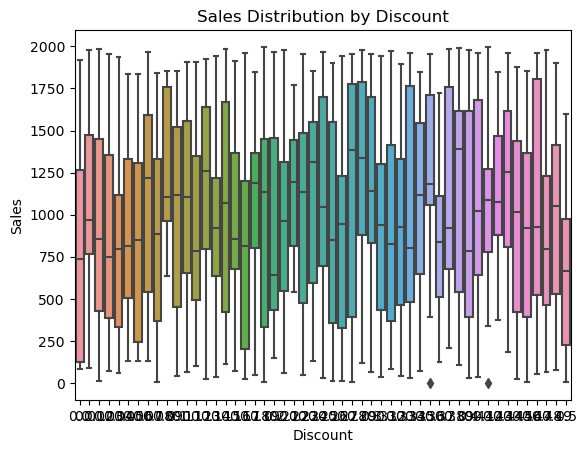

In [44]:
# Plot Sales Distirbution
sns.boxplot(x='Discount', y='Sales', data=data)
plt.title('Sales Distribution by Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

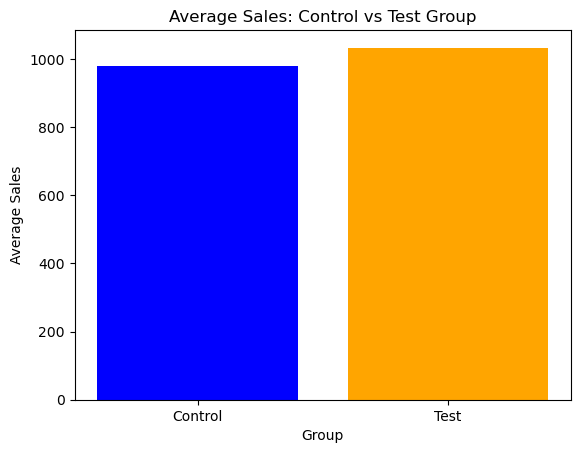

In [45]:
#Plot Average Sales
plt.bar(['Control', 'Test'], [control_sales_mean, test_sales_mean], color=['blue', 'orange'])
plt.title('Average Sales: Control vs Test Group')
plt.xlabel('Group')
plt.ylabel('Average Sales')
plt.show()

In [46]:
#Source: Exploring ecommerce trends Link: https://www.kaggle.com/datasets/muhammadroshaanriaz/e-commerce-trends-a-guide-to-leveraging-dataset